# Assignment 5.1:  Implement the movie review classifier found in section 3.4 of *Deep Learning with Python.*

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 4s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 10s 662us/step - loss: 0.5131 - acc: 0.7889 - val_loss: 0.3844 - val_acc: 0.8713
Epoch 2/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.3068 - acc: 0.9050 - val_loss: 0.3325 - val_acc: 0.8678
Epoch 3/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.2248 - acc: 0.9273 - val_loss: 0.2780 - val_acc: 0.8925
Epoch 4/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.1772 - acc: 0.9442 - val_loss: 0.2788 - val_acc: 0.8857
Epoch 5/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.1416 - acc: 0.9567 - val_loss: 0.3037 - val_acc: 0.8802
Epoch 6/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.1181 - acc: 0.9626 - val_loss: 0.2941 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0988 - acc: 0.9705 - val_loss: 0.3108 -

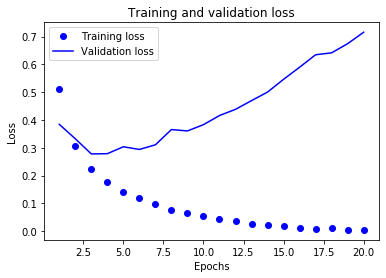

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

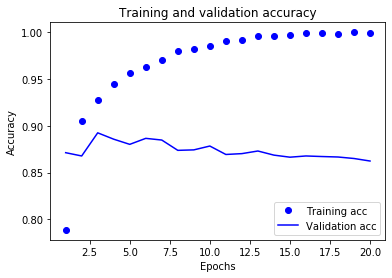

In [14]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 159us/step - loss: 0.4757 - accuracy: 0.8096
Epoch 2/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.2748 - accuracy: 0.9086
Epoch 3/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.2093 - accuracy: 0.9268
Epoch 4/4
25000/25000 [==============================] - 8s 323us/step


In [16]:
results

[0.2987830638217926, 0.8813199996948242]

In [17]:
model.predict(x_test)

array([[0.15451086],
       [0.9975667 ],
       [0.704646  ],
       ...,
       [0.07761247],
       [0.04741837],
       [0.47164786]], dtype=float32)

# Assignment 5.2:  Implement the news classifier found in section 3.5 of *Deep Learning with Python.*

In [1]:
# Loading the Reuters dataset.
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [2]:
# Encoding the data.
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results_news = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results_news[i, sequence] = 1.
    return results_news

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# Using built Keras model to vectorize the labels
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [5]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Validating the approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
# train the network for 20 epochs.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 166us/step - loss: 2.6278 - accuracy: 0.5145 - val_loss: 1.7552 - val_accuracy: 0.6170
Epoch 2/20
7982/7982 [==============================] - 1s 159us/step - loss: 1.4462 - accuracy: 0.6891 - val_loss: 1.3032 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 1s 126us/step - loss: 1.0605 - accuracy: 0.7739 - val_loss: 1.1112 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8311 - accuracy: 0.8269 - val_loss: 1.0191 - val_accuracy: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.6610 - accuracy: 0.8648 - val_loss: 0.9712 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 116us/step - loss: 0.5285 - accuracy: 0.8918 - val_loss: 0.9078 - val_accuracy: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 122us/step - loss

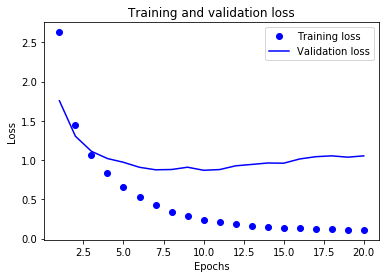

In [8]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


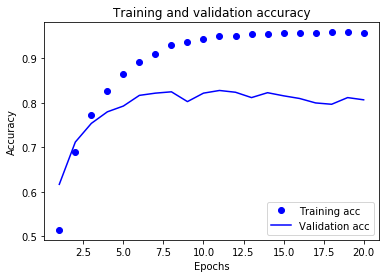

In [12]:
# Plotting the training and validation accuracy
# print(history.history.keys())
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 158us/step - loss: 2.6769 - accuracy: 0.5204 - val_loss: 1.8037 - val_accuracy: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.4631 - accuracy: 0.6983 - val_loss: 1.3402 - val_accuracy: 0.7130
Epoch 3/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.0821 - accuracy: 0.7705 - val_loss: 1.1614 - val_accuracy: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 120us/step - loss: 0.8556 - accuracy: 0.8180 - val_loss: 1.0606 - val_accuracy: 0.7750
Epoch 5/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.6892 - accuracy: 0.8527 - val_loss: 0.9968 - val_accuracy: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5546 - accuracy: 0.8816 - val_loss: 0.9586 - val_accuracy: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.448

In [16]:
# Final Results
results

[0.9903275057978643, 0.7871772050857544]

In [17]:
# Generating predictions for the new data
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999998
3


In [18]:
# Encoding the labels by casting them as an integer tensor

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [19]:
# Changing the choice of loss function due to the casting in the above line of code
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [20]:
# Showing a model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 227us/step - loss: 3.5258 - accuracy: 0.0799 - val_loss: 3.2098 - val_accuracy: 0.1130
Epoch 2/20
7982/7982 [==============================] - 2s 220us/step - loss: 2.8176 - accuracy: 0.2240 - val_loss: 2.4966 - val_accuracy: 0.5330
Epoch 3/20
7982/7982 [==============================] - 2s 201us/step - loss: 2.1279 - accuracy: 0.5331 - val_loss: 2.0766 - val_accuracy: 0.4950
Epoch 4/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.8160 - accuracy: 0.5128 - val_loss: 1.9067 - val_accuracy: 0.4870
Epoch 5/20
7982/7982 [==============================] - 1s 168us/step - loss: 1.5590 - accuracy: 0.5442 - val_loss: 1.6744 - val_accuracy: 0.5490
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.2743 - accuracy: 0.6675 - val_loss: 1.4794 - val_accuracy: 0.6480
Epoch 7/20
7982/7982 [==============================] - 1s 157us/step - loss

# Assignment 5.3:  Implement the housing price regression model found in section 3.6 of *Deep Learning with Python.*

In [21]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [22]:
# Taking a look at the data
print(train_data.shape)
test_data.shape

(404, 13)


(102, 13)

In [23]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [25]:
# Model definition
from keras import models
from keras import layers

def build_model():
    model_housing = models.Sequential()
    model_housing.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model_housing.add(layers.Dense(64, activation='relu'))
    model_housing.add(layers.Dense(1))
    model_housing.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model_housing

In [26]:
# K-fold validation

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [27]:
# results at 100 epochs
print(all_scores)
np.mean(all_scores)

[2.3391318321228027, 2.226796865463257, 2.7730000019073486, 2.556352376937866]


2.4738202691078186

In [31]:
# Training with 500 epochs and saving the validation logs at each fold
# print(history.history.keys())
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


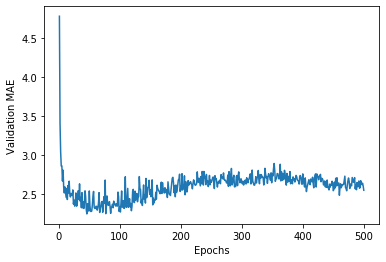

In [33]:
# average of per epoch MAE scores for all folds and a plot

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

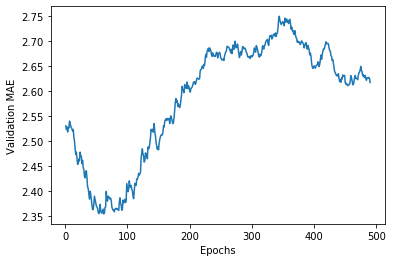

In [34]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [35]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score


102/102 [==============================] - 0s 139us/step


2.789116382598877